## Importar librerias

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis

##### Se leera el archivo con los datos de moustros y despues nos arrojara los primeros 5.

In [59]:
df = pd.read_csv("D:/Moustros/MOUSTROS/train.csv")
df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


##### Mostrara la descripcion asi podemos ver que esten dentro de los parametros.

In [60]:
df.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


##### Creamos una copia para poder modificarla para tener un mejor control y despues ver las filas con valores null.

In [61]:
df.cleaned = df.copy()
df.dropna()

C:\Users\Krato\AppData\Local\Temp\ipykernel_12852\4228728994.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cleaned = df.copy()


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
...,...,...,...,...,...,...,...
366,886,0.458132,0.391760,0.660590,0.635689,blue,Goblin
367,889,0.331936,0.564836,0.539216,0.551471,green,Ghost
368,890,0.481640,0.501147,0.496446,0.544003,clear,Ghoul
369,896,0.294943,0.771286,0.583503,0.300618,clear,Ghost


##### Elimino los datos que se me hacen inservibles 

In [62]:
df.cleaned = df.cleaned.drop(['id', 'rotting_flesh', 'has_soul'], axis=1)

##### Pedimos ver cuales son las columnas que nos quedaron.

In [63]:
df.cleaned.columns

Index(['bone_length', 'hair_length', 'color', 'type'], dtype='object')

##### Hacemos grafica para ver su relación, asi como podemos observar que viendo la tabla tenemos que entre mas grandes sean los guesos tienen mas pelaje.

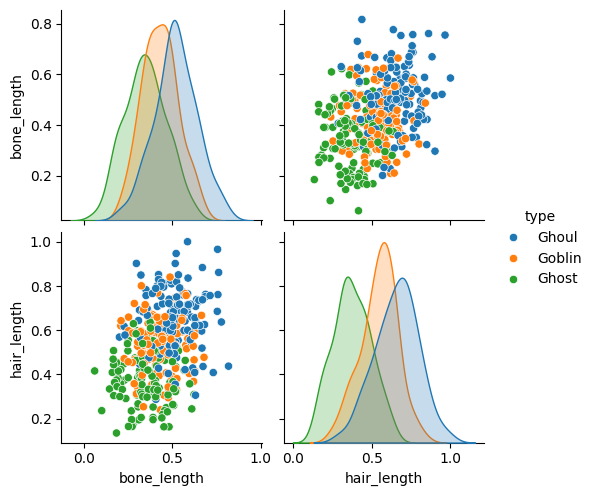

In [64]:
sns.pairplot(df.cleaned, hue='type')

# Entrenamiento

#### A los valores de X, Y les asignamos valores la cual seran las clases para ver el tipo de moustro.

In [71]:
X = df.cleaned.drop(['type'], axis=1)
Y = df.cleaned['type']

##### Para una mejor lectura se pasaran todos los valores a datos númericos lo cual necesitamos (LabelEnconder, fit_transform) asi cambiambos por ejemplo el color.

##### importamos ahora esas librerias.

In [76]:
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [77]:
X['color'] = LabelEncoder().fit_transform(X['color'])
Y = LabelEncoder().fit_transform(Y)

##### Dividimos los datos

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### Se inicializan los modelos los cuales son: Árboles de decisión, Redes neuronales multicapas y Maquina de soporte vectorial.
##### Árboles de Decisión: Algoritmo de clasificación supervisado que utiliza una estructura jerárquica basada en la información de los atributos del conjunto de datos.
##### Redes Neuronales Multicapa: Modelo supervisado con múltiples capas de neuronas interconectadas. Ajusta los pesos de las conexiones para minimizar el error de predicción. Parámetros: semilla inicial, 1000 iteraciones y tasa de aprendizaje adaptativa.
##### Máquinas de Soporte Vectorial (SVM): Clasificación supervisada que separa los datos con un hiperplano. Se utilizará un kernel lineal.
##### Se evaluarán estos modelos para determinar cuál es el más eficiente en la clasificación y predicción de datos.

In [79]:
arbol = DecisionTreeClassifier()
mlp = MLPClassifier(random_state=1, max_iter=1000, verbose=True, learning_rate="adaptive")
svm = SVC(kernel='linear', verbose=True)

##### Agregamos datos para el entrenamiento del árbol.

In [80]:
arbol.fit(X_train, Y_train)

DecisionTreeClassifier()

##### Agregamos datos para el modelo MLP.

In [81]:
mlp.fit(X_train, Y_train)

Iteration 1, loss = 1.09301239
Iteration 2, loss = 1.08408349
Iteration 3, loss = 1.08120682
Iteration 4, loss = 1.07945548
Iteration 5, loss = 1.07828580
Iteration 6, loss = 1.07652862
Iteration 7, loss = 1.07396098
Iteration 8, loss = 1.07096456
Iteration 9, loss = 1.06854766
Iteration 10, loss = 1.06648893
Iteration 11, loss = 1.06485058
Iteration 12, loss = 1.06288813
Iteration 13, loss = 1.06121470
Iteration 14, loss = 1.05883923
Iteration 15, loss = 1.05707253
Iteration 16, loss = 1.05418014
Iteration 17, loss = 1.05255286
Iteration 18, loss = 1.05046041
Iteration 19, loss = 1.04872300
Iteration 20, loss = 1.04684655
Iteration 21, loss = 1.04501225
Iteration 22, loss = 1.04294583
Iteration 23, loss = 1.04088073
Iteration 24, loss = 1.03848674
Iteration 25, loss = 1.03620465
Iteration 26, loss = 1.03421453
Iteration 27, loss = 1.03263394
Iteration 28, loss = 1.03120378
Iteration 29, loss = 1.02970182
Iteration 30, loss = 1.02721900
Iteration 31, loss = 1.02485164
Iteration 32, los

MLPClassifier(learning_rate='adaptive', max_iter=1000, random_state=1,
              verbose=True)

##### Por ultimo para el svc.

In [85]:
svm.fit(X_train, Y_train)

[LibSVM]

SVC(kernel='linear', verbose=True)

##### Sacamos todos los valores. (test)

In [86]:
Y_predict_arbol = arbol.predict(X_test)
Y_predict_svm = svm.predict(X_test)
Y_predict_mlp = mlp.predict(X_test)

##### Observamos las mediciones.

In [102]:
print(metrics.accuracy_score(Y_test, Y_predict_arbol))
print(metrics.accuracy_score(Y_test, Y_predict_svm))
print(metrics.accuracy_score(Y_test, Y_predict_mlp))

0.52
0.6533333333333333
0.6533333333333333


<Axes: xlabel='type', ylabel='Count'>

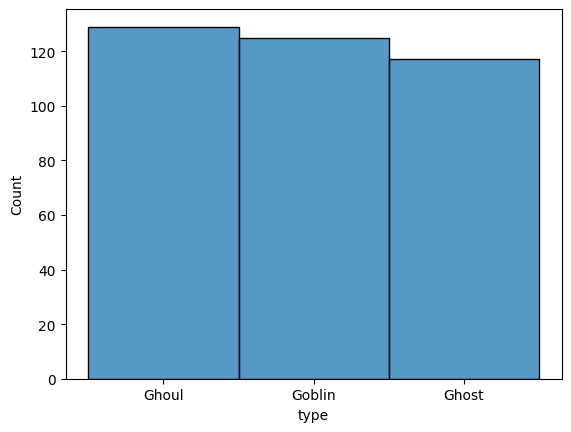

In [99]:
sns.histplot(df.cleaned['type'])

## Conclusion
En la evaluación de modelos de clasificación, se compararon tres enfoques:

Árboles de Decisión: Precisión del 52%. Aunque fácil de interpretar, su precisión es la más baja, indicando que podría no capturar bien las complejidades del conjunto de datos.

Máquinas de Soporte Vectorial (SVM): Precisión del 65.33%. Ofreció una mejor precisión que los árboles de decisión y es adecuado para datos con alta dimensionalidad.

Redes Neuronales Multicapa (MLP): Precisión del 65.33%. Alcanzó la misma precisión que el SVM, pero con la ventaja de modelar relaciones más complejas en los datos.

Recomendación: Tanto el SVM como el MLP tienen un rendimiento similar y superior al de los árboles de decisión. La elección entre ellos puede depender de factores adicionales como la interpretabilidad y el tiempo de entrenamiento.

